# Desmontando sistemas esotericos

 En esta entrega, demostraremos, que el trading astral, o basado en las lunas, es una falacia. Intentar relacionar dos femonemos independientes y mediante el sesgo narrativo, es hacerse trampas al solitario. 

 En esta primera entrega, romperemos la creencia popular, de que "la bolsa sube con la luna llena". Pero bueno, a los escepticos, olvidaos de la luna, y tomad este notebook como un ejemplo claro de backtesting con pandas.

Como van a salir muchisimos de engañados, diciendo que se compra en luna llena y se vende cuando la luna de valencia se alinea con la constelacion de saturno etc... dejamos abierta la puerta a los haters, para que nos den tareas de datascience para realizar.


## Empezaremos cargando las librerias necesarias para dicho cometido
Nos centraremos basicamente en pandas y matplotlib, por simplificar todo al maximo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylb

import warnings
warnings.filterwarnings("ignore")

# Fuente de datos.

En el grupo de Python Para Trading de Telegram, un usuario deseaba contrastar por el mismo el tema de las lunas, y creo un codigo, que catalogaba las fechas en funcion de su fase lunar, si el me da permiso, publicare el codigo, mientras tanto, teneis que fiaros de mi (o comprobar que las fechas esten bien)

In [2]:
df = pd.read_csv('X:/raw_data/Lunas/SPLunar.csv',parse_dates=True,index_col=['Date'])
cols = cols = ['Close', 'Volume', 'Luna', 'Retorno']
df = df[cols]
df.head(10)

,Close,Volume,Luna,Retorno
Date,,,,
1950-01-04,16.850000,1890000,First Quarter,0.011405
1950-01-05,16.930000,2550000,Full Moon,0.004748
1950-01-06,16.980000,2010000,Full Moon,0.002953
1950-01-09,17.080000,2520000,Full Moon,0.005889
1950-01-10,17.030001,2160000,Full Moon,-0.002927
1950-01-11,17.090000,2630000,Full Moon,0.003523
1950-01-12,16.760000,2970000,Last Quarter,-0.019310
1950-01-13,16.670000,3330000,Last Quarter,-0.005370
1950-01-16,16.719999,1460000,Last Quarter,0.002999


Como podemos comprobar, empezamos en 1950, cuanta mas muestra mejor, mayor validez estadistica.

# Creando la primera condicion de entrada, comprar en luna llena, y vender cuando cambie de fase

Vamos a demostrar la primera premisa basica. 'La bolsa sube cuando hay luna llena', tambien valdria para demostrar, que 'La bolsa baja cuando hay luna llena'
Basicamente, nuestro trigger sera que la fase lunar sea igual a luna llena.

In [3]:
df['entrada'] = np.where(df['Luna'] == 'Full Moon',1,0)

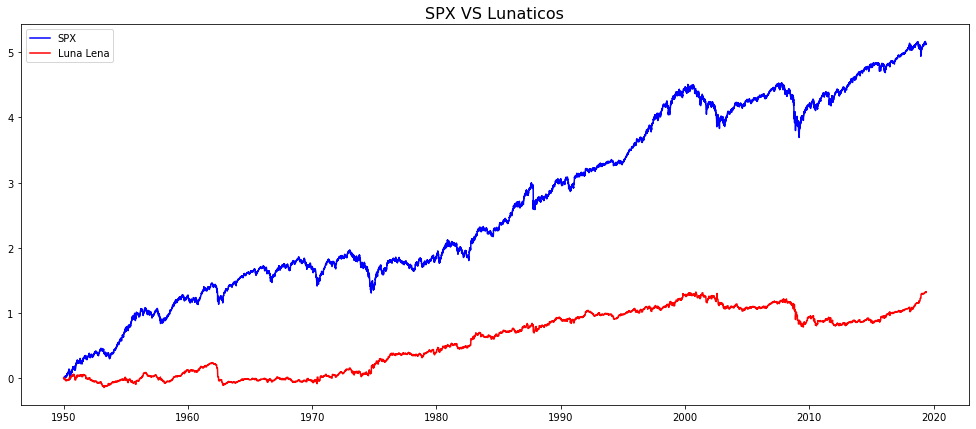

In [4]:
df['TR'] = 0.
df['TR'] = np.log(df['Close']/df['Close'].shift(1))
df['TR'] = df['TR'].shift(-1)

df['SR'] = 0.
df['SR'] = np.where(df['entrada'] == True, df['TR'], -0)

df['CMR'] = np.cumsum(df['TR'])
df['CSR'] = np.cumsum(df['SR'])

plt.figure(figsize=(17,7))
plt.title('SPX VS Lunaticos', fontsize=16)
plt.plot(df['CMR'], color='b', label='SPX')
plt.plot(df['CSR'], color='r', label='Luna Lena')
plt.legend()
plt.show()

# ¿Que ha pasado aqui?

Pues como podemos ver, la luna llena no predice absolutamente nada, simplemente nos perdemos tiempo de mercado fuera, y por consecuencia, perdemos retorno

Asi que vamos a dar paso a los cortos...

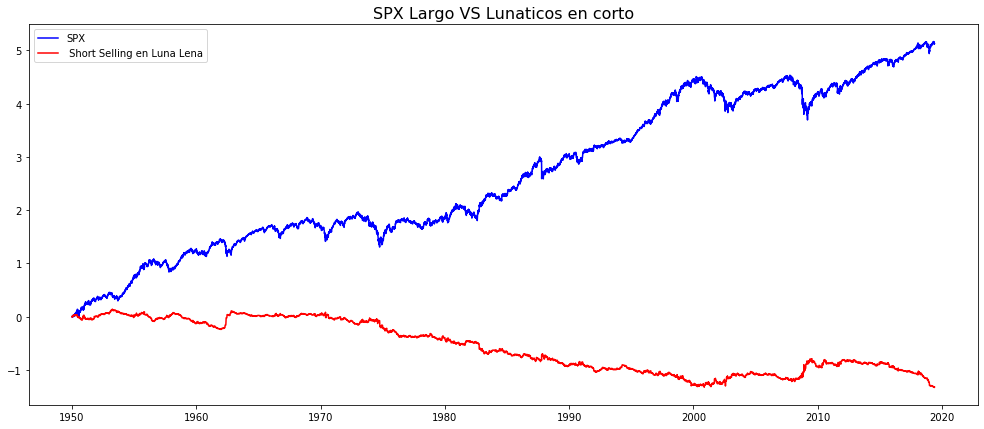

In [5]:
df['TR'] = 0.
df['TR'] = np.log(df['Close']/df['Close'].shift(1))
df['TR'] = df['TR'].shift(-1)

df['SR'] = 0.
df['SR'] = np.where(df['entrada'] == True, df['TR'], -0)

df['CMR'] = np.cumsum(df['TR'])
df['CSR'] = np.cumsum(df['SR'])

plt.figure(figsize=(17,7))
plt.title('SPX Largo VS Lunaticos en corto', fontsize=16)
plt.plot(df['CMR'], color='b', label='SPX')
plt.plot(-1*df['CSR'], color='r', label=' Short Selling en Luna Lena')
plt.legend()
plt.show()

Podemos observar que el SPX no le gustan los cortos, y mucho menos en lunas llenas, pero no por las lunas, sino por el sesgo alcista de los indices, que significa, que el darwinismo saca a las peores empresas de los indices, y mente a las mejores, por eso no es buena idea montarse una sicav, y hacerle la contraria a el mercado.

    
    

# Ahora repasaremos las otras fases de la luna, simplemente cambiando la condicion de entrada, el resto del backtester sera absolutamente igual

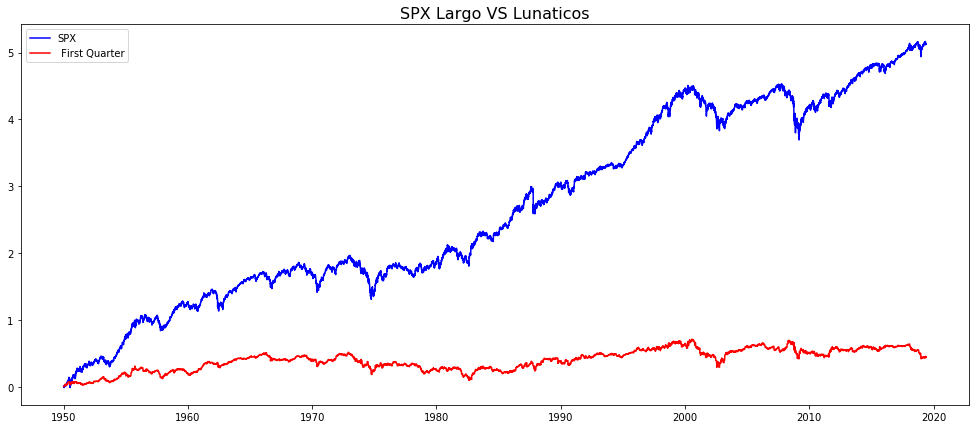

In [6]:
df['entrada'] = np.where(df['Luna'] == 'First Quarter',1,0)
df['TR'] = 0.
df['TR'] = np.log(df['Close']/df['Close'].shift(1))
df['TR'] = df['TR'].shift(-1)

df['SR'] = 0.
df['SR'] = np.where(df['entrada'] == True, df['TR'], -0)

df['CMR'] = np.cumsum(df['TR'])
df['CSR'] = np.cumsum(df['SR'])

plt.figure(figsize=(17,7))
plt.title('SPX Largo VS Lunaticos', fontsize=16)
plt.plot(df['CMR'], color='b', label='SPX')
plt.plot(df['CSR'], color='r', label=' First Quarter')
plt.legend()
plt.show()

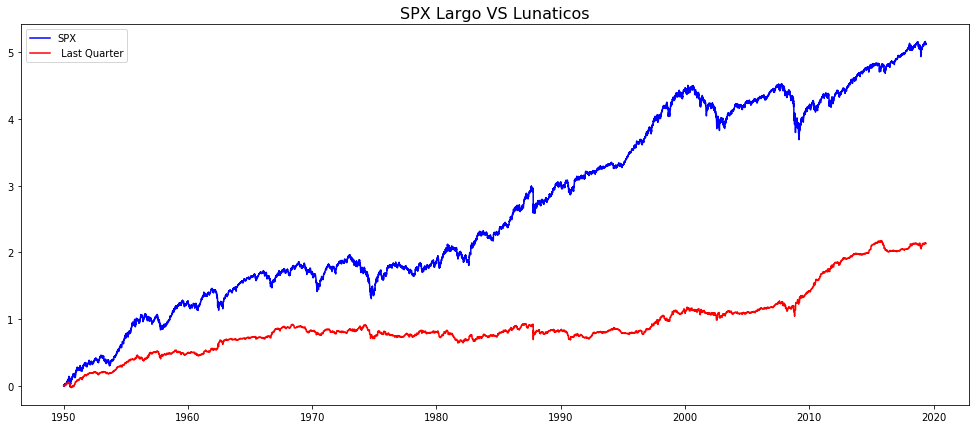

In [7]:
df['entrada'] = np.where(df['Luna'] == 'Last Quarter',1,0)
df['TR'] = 0.
df['TR'] = np.log(df['Close']/df['Close'].shift(1))
df['TR'] = df['TR'].shift(-1)

df['SR'] = 0.
df['SR'] = np.where(df['entrada'] == True, df['TR'], -0)

df['CMR'] = np.cumsum(df['TR'])
df['CSR'] = np.cumsum(df['SR'])

plt.figure(figsize=(17,7))
plt.title('SPX Largo VS Lunaticos', fontsize=16)
plt.plot(df['CMR'], color='b', label='SPX')
plt.plot(df['CSR'], color='r', label=' Last Quarter')
plt.legend()
plt.show()

# Conclusiones

No os dejeis engañar, si quereis podeis confiar en quien querais, pero siempre verificad lo que se esta haciendo. 

Yo soy el primero que me gustaria creer que la luna tiene poder predictivo, y poder adaptar mis sistemas hacia algo tan indiscutible , como las fases de la luna, que no tiene ningun tipo de ambiguedad, si es luna llena, es luna llena, y no hay mas discusiones.

Hare un poco mas de data science con la luna, probando todas las combinatorias posibles, y ademas realizando un poco de data-science a ver si hay alguna ventaja enmascarada detras de ella, pero ya os digo, que lo hare para enseñar tecenicas de data-science, no para encontrar ninguna ventaja, por que...(spoiler) ¡NO LA HAY!

Un saludo a @PablusWolve y @Albitamix, que tan bloqueadisimo me tienen en twitter, por intentar romper esa estafa de curso que tienen entre manos!